In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data = pd.read_csv("./sample_data/mnist_train_small.csv").values

In [0]:
X, y = data[:, 1:], data[:, 0]

In [0]:
X_eight = X[y==8]

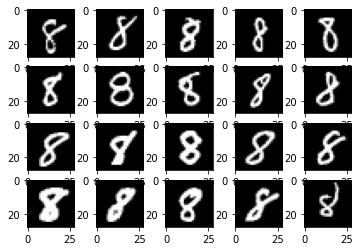

In [26]:
plt.figure()
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_eight[i].reshape(28, 28), cmap="gray")

plt.show()

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

In [0]:
adam = Adam(lr=2e-4,beta_1=0.5)

In [0]:
def get_generator(noise_size):
    in_layer = Input(shape=(noise_size,))
    d1 = Dense(200, activation="tanh")(in_layer)
    d2 = Dense(400, activation="tanh")(d1)
    d3 = Dense(784, activation="tanh")(d2)
    
    model = Model(inputs=[in_layer], outputs=[d3])
    model.compile(optimizer=adam, loss="binary_crossentropy")
    
    return model

In [0]:
generator = get_generator(100)

In [31]:
generator.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_7 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               314384    
Total params: 414,984
Trainable params: 414,984
Non-trainable params: 0
_________________________________________________________________


In [0]:
def get_discriminator():
    in_layer = Input(shape=(784,))
    d1 = Dense(400, activation="tanh")(in_layer)
    d2 = Dense(100, activation="tanh")(d1)
    d3 = Dense(1, activation="sigmoid")(d2)
    
    model = Model(inputs=[in_layer], outputs=[d3])
    model.compile(optimizer=adam, loss="binary_crossentropy")
    
    return model

In [0]:
discriminator = get_discriminator()

In [34]:
discriminator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 354,201
Trainable params: 354,201
Non-trainable params: 0
_________________________________________________________________


In [35]:
in_layer = Input(shape=(100,))
gen_layer = generator(in_layer)
dis_layer = discriminator(gen_layer)

gan = Model(in_layer, dis_layer)

gan.compile(optimizer=adam, loss="binary_crossentropy")

gan.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
model_3 (Model)              (None, 784)               414984    
_________________________________________________________________
model_4 (Model)              (None, 1)                 354201    
Total params: 769,185
Trainable params: 769,185
Non-trainable params: 0
_________________________________________________________________


In [0]:
# discriminator.trainable = True

# gan.summary()

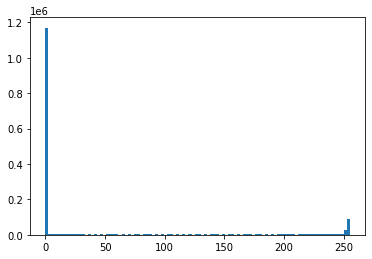

In [37]:
out = plt.hist(X_eight.flatten(), bins=100)

In [0]:
X_mod = (X_eight.astype(float) - 127) / 127

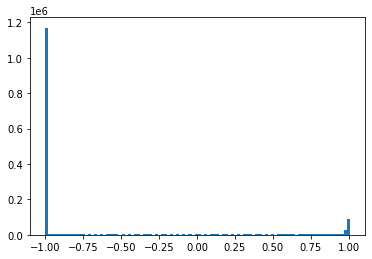

In [39]:
out = plt.hist(X_mod.flatten(), bins=100)

In [40]:
X_mod.max()

1.0078740157480315

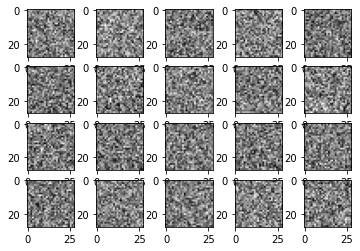

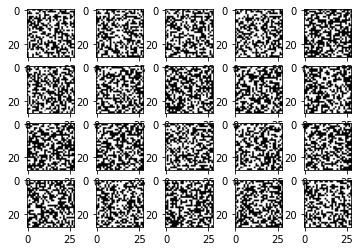

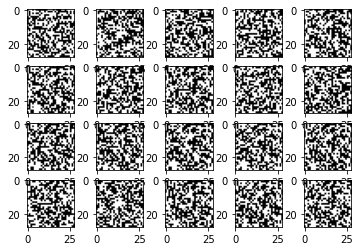

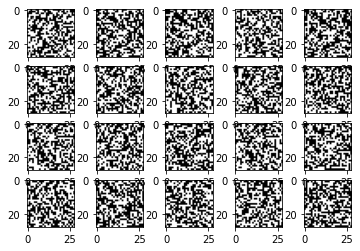

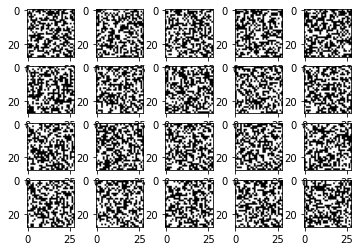

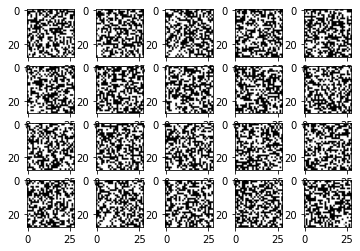

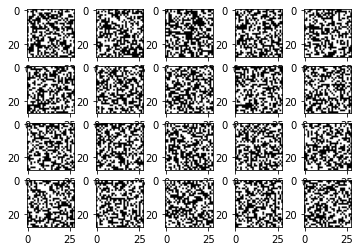

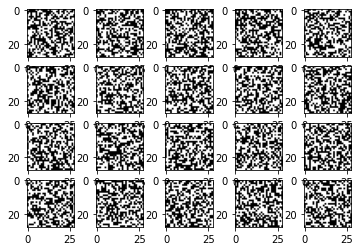

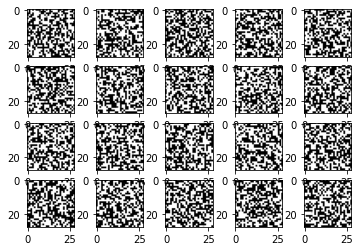

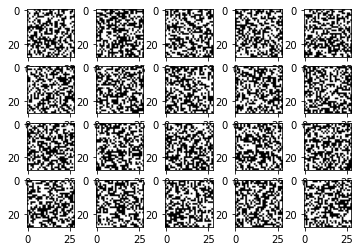

In [41]:
for i in range(1000):
  noise = np.random.normal(0, 1, (1000, 100))
  fake = generator.predict(noise, verbose=0)

  x_real_disc = X_mod[np.random.randint(0, len(X_mod), 1000)]
  x_fake_disc = fake

  discriminator.trainable = True

  discriminator.fit(x_real_disc, np.ones((1000, 1)), verbose=0)
  discriminator.fit(x_fake_disc, np.zeros((1000, 1)), verbose=0)

  discriminator.trainable = False

  noise = np.random.normal(0, 1, (1000, 100))
  gan.fit(noise, np.ones((1000, 1)), verbose=0)

  if i % 100 == 0:
    plt.figure()
    plt.title(str(i))
    for i in range(20):
        plt.subplot(4, 5, i+1)
        plt.imshow(fake[i].reshape(28, 28), cmap="gray")

    plt.show()